In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 



In [5]:
img = cv2.imread('pano0\\frame_42.jpg')

M = np.array([[1,0,0],[0,1,0],[0.0001,0,1]])
w,h = img.shape[:2]


AttributeError: 'NoneType' object has no attribute 'shape'

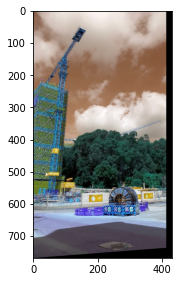

In [ ]:
img_warpped = cv2.warpPerspective(img, M, dsize=(h,w))

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.imshow(img_warpped)
plt.show()

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]
<class 'numpy.ndarray'>


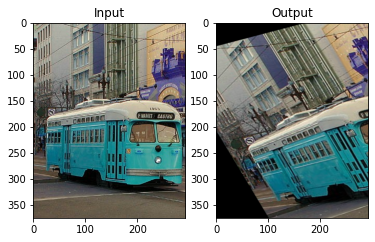

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
  
  
img = cv2.imread('data\source001\source001_01.jpg')
rows, cols, ch = img.shape
  
pts1 = np.float32([[50, 50],
                   [200, 50], 
                   [50, 200]])
  
pts2 = np.float32([[10, 100],
                   [200, 50], 
                   [100, 250]])
  
M = cv2.getAffineTransform(pts1, pts2)
print(M)
print(type(M))
dst = cv2.warpAffine(img, M, (cols, rows))
  
plt.subplot(121)
plt.imshow(img)
plt.title('Input')
  
plt.subplot(122)
plt.imshow(dst)
plt.title('Output')
  
plt.show()

In [10]:
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

res = minimize(rosen, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True} )

print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[1. 1. 1. 1. 1.]


In [11]:
# 目标函数
def fun(a,b,c,d):
    def v(x):
        return np.log2(1+x[0]*a/b)+np.log2(1+x[1]*c/d)
    return v
#限制条件函数
def con(a,b,i):
    def v(x):
        return np.log2(1 + x[i] * a / b)-5
    return v



if __name__ == "__main__":
    # 定义常量值
    args = [2, 1, 3, 4]  # a,b,c,d
    args1 = [2, 5, 6, 4] 
    # 设置初始猜测值
    x0 = np.asarray((0.5, 0.5))
    #设置限制条件
    '''Equality constraint means that the constraint function result is
     to be zero whereas inequality means that it is to be non-negative'''
    cons = ({'type': 'ineq', 'fun': con(args1[0],args1[1],0)},
            {'type': 'ineq', 'fun': con(args1[2],args1[3],1)},
            )

    res = minimize(fun(args[0],args[1],args[2],args[3]), x0, constraints=cons)
    print(res.fun)
    print(res.success)
    print(res.x)

11.329796332293162
True
[77.5        20.66666658]


In [ ]:
def find_focal(opt_focal, curr_px):
    '''import the equivalent focal length'''
    return opt_focal / 43.23 * curr_px